In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
!pip install gdown
import pandas as pd
import gdown

In [3]:
file_id = '1dNHQPSAb_S9Upptf2KD53nElQFzbeL2O'
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'QVI_data.csv', quiet=False)

data = pd.read_csv('QVI_data.csv')

Downloading...
From: https://drive.google.com/uc?id=1dNHQPSAb_S9Upptf2KD53nElQFzbeL2O
To: /content/QVI_data.csv
100%|██████████| 29.0M/29.0M [00:00<00:00, 134MB/s]


In [4]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,17/10/2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,16/09/2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,07/03/2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,08/03/2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,02/11/2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [5]:
data.info()
# date colum should be in date Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [6]:
data['DATE'] = pd.to_datetime(data['DATE'])

<ipython-input-6-55f29f578728>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['DATE'] = pd.to_datetime(data['DATE'])


In [7]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-07-03,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-08-03,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-02-11,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [8]:
data.BRAND.unique()

array(['NATURAL', 'RRD', 'GRNWVES', 'WOOLWORTHS', 'CHEETOS', 'INFUZIONS',
       'DORITOS', 'OLD', 'SMITHS', 'KETTLE', 'CCS', 'TOSTITOS', 'COBS',
       'BURGER', 'THINS', 'TYRRELLS', 'CHEEZELS', 'TWISTIES', 'SUNBITES',
       'PRINGLES', 'FRENCH'], dtype=object)

In [9]:
data.PACK_SIZE.unique()

array([175, 150, 210, 160, 165, 110, 330, 170, 300, 180, 135,  70, 220,
       190, 270,  90, 200, 134, 380, 125, 250])

In [10]:
data.PROD_QTY.unique()

array([2, 1, 4, 3, 5])

# Finding the Control Stores:

Client has already selected store number 77,86,88 as Trial/Treatement and want the control stores to be established stores that are operational for the entire observational period.

We would want to match trial stores to control stores that are similar to the trial
store prior to the trial period of Feb 2019 in terms of :
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer


In [11]:
# yyyymm format of month_ID column
data['month_ID'] = data['DATE'].dt.strftime('%Y%m')
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,month_ID
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-07-03,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201907
3,1003,2019-08-03,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201908
4,1004,2018-02-11,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201802


In [12]:
data['month_ID'] = pd.to_numeric(data['month_ID'])
data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,month_ID
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-07-03,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201907
3,1003,2019-08-03,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201908
4,1004,2018-02-11,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201802
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-08-12,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,201808
264830,2370751,2018-01-10,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,201801
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,201810
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,201810


In [13]:
data.STORE_NBR.unique()
# total 272 stores in the dataset

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86, 155,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [16]:
## Calculate monthly sales revenue

totSales = data.groupby(['STORE_NBR', 'month_ID'])['TOT_SALES'].sum()
totSales

STORE_NBR  month_ID
1          201801       76.0
           201802       42.6
           201803       45.5
           201804       47.9
           201805       47.6
                       ...  
272        201908       99.3
           201909       99.0
           201910       98.8
           201911      116.9
           201912       64.6
Name: TOT_SALES, Length: 6220, dtype: float64

In [17]:
## Montly number of customers per store
nCustomers = data.groupby(['STORE_NBR','month_ID'])['LYLTY_CARD_NBR'].nunique()
nCustomers

STORE_NBR  month_ID
1          201801      19
           201802      12
           201803      11
           201804      10
           201805      10
                       ..
272        201908      12
           201909      11
           201910      11
           201911      14
           201912       8
Name: LYLTY_CARD_NBR, Length: 6220, dtype: int64

In [18]:
nTxn = data.groupby(['STORE_NBR','month_ID'])['TXN_ID'].nunique()
nTxn

STORE_NBR  month_ID
1          201801      19
           201802      12
           201803      11
           201804      10
           201805      10
                       ..
272        201908      12
           201909      11
           201910      11
           201911      14
           201912       8
Name: TXN_ID, Length: 6220, dtype: int64

In [21]:
## Transaction per customers
nTxnPerCust = nTxn / nCustomers
nTxnPerCust

STORE_NBR  month_ID
1          201801      1.0
           201802      1.0
           201803      1.0
           201804      1.0
           201805      1.0
                      ... 
272        201908      1.0
           201909      1.0
           201910      1.0
           201911      1.0
           201912      1.0
Length: 6220, dtype: float64

In [22]:
## total prod per month

monthly_prod = data.groupby(['STORE_NBR', 'month_ID'])['PROD_QTY'].sum()
monthly_prod

STORE_NBR  month_ID
1          201801      21
           201802      12
           201803      12
           201804      14
           201805      13
                       ..
272        201908      23
           201909      22
           201910      22
           201911      26
           201912      16
Name: PROD_QTY, Length: 6220, dtype: int64

In [25]:
## Chips bought per transaction
nChipsPerTxn = monthly_prod / nTxn
nChipsPerTxn

STORE_NBR  month_ID
1          201801      1.105263
           201802      1.000000
           201803      1.090909
           201804      1.400000
           201805      1.300000
                         ...   
272        201908      1.916667
           201909      2.000000
           201910      2.000000
           201911      1.857143
           201912      2.000000
Length: 6220, dtype: float64

In [27]:
## average price per unit
avgPricePerUnit = totSales/ monthly_prod
avgPricePerUnit

STORE_NBR  month_ID
1          201801      3.619048
           201802      3.550000
           201803      3.791667
           201804      3.421429
           201805      3.661538
                         ...   
272        201908      4.317391
           201909      4.500000
           201910      4.490909
           201911      4.496154
           201912      4.037500
Length: 6220, dtype: float64

In [32]:
# creating pivot table with all the calculated values
metrics_df = pd.DataFrame({
    'totSales': totSales,
    'nCustomers': nCustomers,
    'nTxnPerCust': nTxnPerCust,
    'nChipsPerTxn': nChipsPerTxn,
    'avgPricePerUnit': avgPricePerUnit
}).reset_index()
metrics_df.head()

,STORE_NBR,month_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201801,76.0,19,1.0,1.105263,3.619048
1,1,201802,42.6,12,1.0,1.000000,3.550000
2,1,201803,45.5,11,1.0,1.090909,3.791667
3,1,201804,47.9,10,1.0,1.400000,3.421429
4,1,201805,47.6,10,1.0,1.300000,3.661538


Filter to the pre-trial period and stores with full observation periods

In [31]:
## define pre-trial period
pretrial = 201902

# Filter for stores with a full 24-month observation period
pretrial_data = metrics_df[metrics_df['month_ID'] < pretrial]
pretrial_data.head(5)

,STORE_NBR,month_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201801,76.0,19,1.0,1.105263,3.619048
1,1,201802,42.6,12,1.0,1.000000,3.550000
2,1,201803,45.5,11,1.0,1.090909,3.791667
3,1,201804,47.9,10,1.0,1.400000,3.421429
4,1,201805,47.6,10,1.0,1.300000,3.661538


In [39]:
full_observation_stores = pretrial_data['STORE_NBR'].value_counts()[pretrial_data['STORE_NBR'].value_counts() == 13].index
full_observation_stores

Int64Index([  1, 182, 168, 169, 170, 171, 172, 173, 174, 175,
            ...
            121,  88,  81,  82,  83,  84, 120, 119,  86,  87],
           dtype='int64', length=239)

In [41]:
# Filter for the pre-trial period and stores with full observation periods
measureOverTime = pretrial_data[pretrial_data['STORE_NBR'].isin(full_observation_stores)].reset_index()
measureOverTime

,index,STORE_NBR,month_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,0,1,201801,76.0,19,1.000000,1.105263,3.619048
1,1,1,201802,42.6,12,1.000000,1.000000,3.550000
2,2,1,201803,45.5,11,1.000000,1.090909,3.791667
3,3,1,201804,47.9,10,1.000000,1.400000,3.421429
4,4,1,201805,47.6,10,1.000000,1.300000,3.661538
...,...,...,...,...,...,...,...,...
3102,6204,272,201809,240.2,26,1.115385,1.931034,4.289286
3103,6205,272,201810,350.3,42,1.023810,1.930233,4.220482
3104,6206,272,201811,318.3,33,1.121212,1.891892,4.547143
3105,6207,272,201812,345.3,41,1.000000,1.878049,4.484416


In [44]:
stats.pearsonr(measureOverTime[measureOverTime['STORE_NBR']==77]['totSales'], measureOverTime[measureOverTime['STORE_NBR']==1]['totSales'])

PearsonRResult(statistic=0.873518212929312, pvalue=9.571767579271295e-05)

In [45]:
(measureOverTime[measureOverTime['STORE_NBR']==77]['totSales'].values -  measureOverTime[measureOverTime['STORE_NBR']==1]['totSales'].values).mean()

26.96153846153846

In [46]:
measureOverTime[measureOverTime['STORE_NBR']==77]['totSales']

884     25.9
885     35.4
886     73.8
887     31.6
888     75.1
889     49.0
890    269.2
891    190.4
892    207.2
893    152.7
894    176.7
895    207.6
896    204.1
Name: totSales, dtype: float64

In [47]:
measureOverTime[measureOverTime['STORE_NBR']==1]['totSales'].values

array([ 76. ,  42.6,  45.5,  47.9,  47.6,  49. , 160. , 172.6, 201.4,
       126.8, 140.2, 122.5, 116.1])

In [48]:
measureOverTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            3107 non-null   int64  
 1   STORE_NBR        3107 non-null   int64  
 2   month_ID         3107 non-null   int64  
 3   totSales         3107 non-null   float64
 4   nCustomers       3107 non-null   int64  
 5   nTxnPerCust      3107 non-null   float64
 6   nChipsPerTxn     3107 non-null   float64
 7   avgPricePerUnit  3107 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 194.3 KB


In [49]:
measureOverTime.isna().sum()

index              0
STORE_NBR          0
month_ID           0
totSales           0
nCustomers         0
nTxnPerCust        0
nChipsPerTxn       0
avgPricePerUnit    0
dtype: int64

In [50]:
def calculate_correlation(input_table, metric_col, trial_stores):
    """
    Calculate the correlation for a measure between trial and control stores.

    Parameters:
    - input_table: pd.DataFrame, the dataset with store metrics.
    - metric_col: str, the store metric used to calculate correlation.
    - trial_stores: list, store numbers of the trial stores.

    Returns:
    - calc_corr_table: pd.DataFrame, a table containing Store1, Store2, and the correlation measure.
    """

    # Initialize an empty list to store the results
    results = []

    for trial_store in trial_stores:
        trial_data = input_table[(input_table['STORE_NBR'] == trial_store) & (input_table['month_ID'] < 201902)]
        control_stores = input_table[(input_table['STORE_NBR'] != trial_store) & (input_table['month_ID'] < 201902)]

        # Calculate the correlation between the trial store and each control store
        for control_store in control_stores['STORE_NBR'].unique():
            trial_metric = trial_data[metric_col]
            control_metric = control_stores[control_stores['STORE_NBR'] == control_store][metric_col]

            # Check for NaN values
            if trial_metric.notna().all() and control_metric.notna().all():
                correlation, _ = stats.pearsonr(trial_metric, control_metric)
            else:
                correlation = np.nan  # Set to NaN if there are missing values

            # Add the results to the list
            results.append({'Store1': trial_store, 'Store2': control_store, 'corr_measure': correlation})

    # Create the DataFrame from the list of results
    calc_corr_table = pd.DataFrame(results)

    return calc_corr_table

In [52]:
## Lets calculate correlation for Avg_Price_Per_Unit
calculate_correlation(measureOverTime,'totSales', [77,86,88] )

,Store1,Store2,corr_measure
0,77,1,0.873518
1,77,2,0.864093
2,77,3,0.956196
3,77,4,0.948598
4,77,5,0.923832
...,...,...,...
709,88,268,0.832195
710,88,269,0.977494
711,88,270,0.959419
712,88,271,0.957159


Apart from correlation, we can also calculate a standardised metric based on the
absolute difference between the trial store's performance and each control store's
performance. Let's write a function for this.


In [53]:
def calculate_magnitude_distance(input_table, metric_col, trial_stores):
    """
    Calculate the standardized magnitude distance for a measure between trial and control stores.

    Parameters:
    - input_table: pd.DataFrame, the dataset with store metrics.
    - metric_col: str, the store metric used to calculate the magnitude distance.
    - trial_stores: list, store numbers of the trial stores.

    Returns:
    - calc_dist_table: pd.DataFrame, a table containing Store1, Store2, and the magnitude distance measure.
    """

    # Initialize an empty list to store the results
    results = []

    for trial_store in trial_stores:
        trial_data = input_table[(input_table['STORE_NBR'] == trial_store) & (input_table['month_ID'] < 201902)]
        control_stores = input_table[(input_table['STORE_NBR'] != trial_store) & (input_table['month_ID'] < 201902)]

        # Calculate the magnitude distance between the trial store and each control store
        for control_store in control_stores['STORE_NBR'].unique():
            trial_metric = trial_data[metric_col].values
            control_metric = control_stores[control_stores['STORE_NBR'] == control_store][metric_col].values

            # Check for NaN values
            if not np.isnan(trial_metric).all() and not np.isnan(control_metric).all():
                magnitude_distance = abs(trial_metric - control_metric).mean()
            else:
                magnitude_distance = None  # Set to None if there are missing values

            # Add the results to the list
            results.append({'Store1': trial_store, 'Store2': control_store, 'magnitude_distance': magnitude_distance})

    # Create the DataFrame from the list of results
    calc_dist_table = pd.DataFrame(results)

    return calc_dist_table

In [54]:
MAGNITUDE_DIST = calculate_magnitude_distance(measureOverTime,'totSales', [77,86,88] )

(array([180.,  72.,  54., 113., 106.,  49.,  46.,  42.,  43.,   9.]),
 array([ 22.22307692,  89.56153846, 156.9       , 224.23846154,
        291.57692308, 358.91538462, 426.25384615, 493.59230769,
        560.93076923, 628.26923077, 695.60769231]),
 <BarContainer object of 10 artists>)

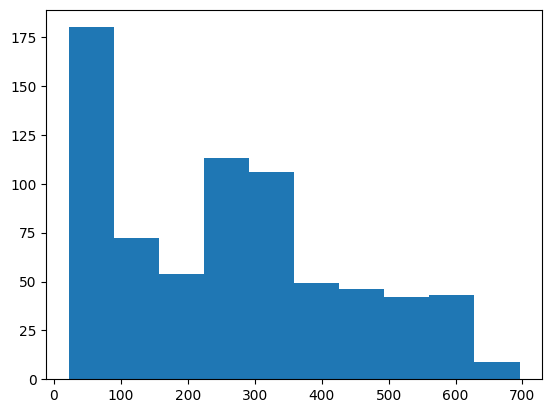

In [55]:
plt.hist(MAGNITUDE_DIST['magnitude_distance'])

Lets modify the function so that the magnitude distance range from 0 to 1

In [56]:
def calculate_standardized_magnitude_distance(input_table, metric_col, trial_stores):
    """
    Calculate the standardized magnitude distance for a measure between trial and control stores.

    Parameters:
    - input_table: pd.DataFrame, the dataset with store metrics.
    - metric_col: str, the store metric used to calculate the magnitude distance.
    - trial_stores: list, store numbers of the trial stores.

    Returns:
    - calc_dist_table: pd.DataFrame, a table containing Store1, Store2, and the standardized magnitude distance measure.
    """

    # Initialize an empty list to store the results
    results = []

    for trial_store in trial_stores:
        trial_data = input_table[(input_table['STORE_NBR'] == trial_store) & (input_table['month_ID'] < 201902)]
        control_stores = input_table[(input_table['STORE_NBR'] != trial_store) & (input_table['month_ID'] < 201902)]

        # Calculate the magnitude distance between the trial store and each control store
        for control_store in control_stores['STORE_NBR'].unique():
            trial_metric = trial_data[metric_col].values
            control_metric = control_stores[control_stores['STORE_NBR'] == control_store][metric_col].values

            # Check for NaN values
            if not np.isnan(trial_metric).all() and not np.isnan(control_metric).all():
                magnitude_distance = abs(trial_metric - control_metric).mean()
            else:
                magnitude_distance = None  # Set to None if there are missing values

            # Add the results to the list
            results.append({'Store1': trial_store, 'Store2': control_store, 'magnitude_distance': magnitude_distance})

    # Create the DataFrame from the list of results
    calc_dist_table = pd.DataFrame(results)

    # Calculate the minimum and maximum magnitude distances
    min_magnitude_distance = calc_dist_table['magnitude_distance'].min()
    max_magnitude_distance = calc_dist_table['magnitude_distance'].max()

    # Standardize the magnitude distance
    calc_dist_table['standardized_magnitude_distance'] = 1 - (calc_dist_table['magnitude_distance'] - min_magnitude_distance) / (max_magnitude_distance - min_magnitude_distance)

    return calc_dist_table

In [57]:
MAGNITUDE_DIST = calculate_standardized_magnitude_distance(measureOverTime,'totSales', [77,86,88] )

(array([  9.,  43.,  42.,  46.,  49., 106., 113.,  54.,  72., 180.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

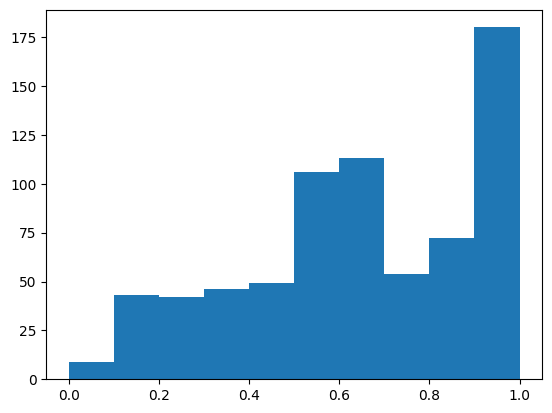

In [58]:
import matplotlib.pyplot as plt
plt.hist(MAGNITUDE_DIST['standardized_magnitude_distance'])

Now let's use the functions to find the control stores! We'll select control stores
based on how similar monthly total sales in dollar amounts and monthly number of
customers are to the trial stores. So we will need to use our functions to get four
scores, two for each of total sales and total customers.

In [61]:
# Define the metrics you want to calculate similarity for
metrics1 = ['totSales']


In [62]:
for METRIC in metrics1:
  MAGNITUDE_DIST = calculate_standardized_magnitude_distance(measureOverTime,METRIC, [77,86,88] )
  PEARSON_CORR = calculate_correlation(measureOverTime,METRIC, [77,86,88] )
  table1 = pd.merge(MAGNITUDE_DIST, PEARSON_CORR, on=['Store1', 'Store2'], how='inner')

In [63]:
# Define the metrics you want to calculate similarity for
metrics2 = ['nCustomers']

In [64]:
for METRIC in metrics2:
  MAGNITUDE_DIST = calculate_standardized_magnitude_distance(measureOverTime,METRIC, [77,86,88] )
  PEARSON_CORR = calculate_correlation(measureOverTime,METRIC, [77,86,88] )
  table2 = pd.merge(MAGNITUDE_DIST, PEARSON_CORR, on=['Store1', 'Store2'], how='inner')

In [65]:
table = pd.merge(table1, table2, on = ['Store1', 'Store2'], how = 'inner')
table.drop(['magnitude_distance_x','magnitude_distance_y'], inplace=True, axis =1)

In [66]:
table

,Store1,Store2,standardized_magnitude_distance_x,corr_measure_x,standardized_magnitude_distance_y,corr_measure_y
0,77,1,0.976148,0.873518,0.969484,0.896881
1,77,2,0.952125,0.864093,0.970657,0.935403
2,77,3,0.398292,0.956196,0.505869,0.967045
3,77,4,0.240667,0.948598,0.377934,0.958868
4,77,5,0.585938,0.923832,0.591549,0.952382
...,...,...,...,...,...,...
709,88,268,0.153947,0.832195,0.312207,0.912235
710,88,269,0.720516,0.977494,0.859155,0.978837
711,88,270,0.721779,0.959419,0.849765,0.963892
712,88,271,0.607517,0.957159,0.733568,0.978157


In [68]:
# create a new weighted score to select the control stores
table['score'] = 0.15*table['standardized_magnitude_distance_x'] + 0.35 * table['corr_measure_x'] + 0.15 * table['standardized_magnitude_distance_y'] + 0.35* table['corr_measure_y']
table.head(5)

,Store1,Store2,standardized_magnitude_distance_x,corr_measure_x,standardized_magnitude_distance_y,corr_measure_y,score
0,77,1,0.976148,0.873518,0.969484,0.896881,0.911484
1,77,2,0.952125,0.864093,0.970657,0.935403,0.918241
2,77,3,0.398292,0.956196,0.505869,0.967045,0.808758
3,77,4,0.240667,0.948598,0.377934,0.958868,0.760403
4,77,5,0.585938,0.923832,0.591549,0.952382,0.833298


In [69]:
table.sort_values(by=['score'], ascending=False)[table['Store1']==86]['Store2'].values[0]

<ipython-input-69-ebcf368bd85b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table.sort_values(by=['score'], ascending=False)[table['Store1']==86]['Store2'].values[0]


122

In [70]:
table.sort_values(by=['score'], ascending=False)[table['Store1']==77]['Store2'].values[0]

<ipython-input-70-7b1e036d3ab9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table.sort_values(by=['score'], ascending=False)[table['Store1']==77]['Store2'].values[0]


141

In [71]:
table.sort_values(by=['score'], ascending=False)[table['Store1']==88]['Store2'].values[0]

<ipython-input-71-2aea8c386855>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table.sort_values(by=['score'], ascending=False)[table['Store1']==88]['Store2'].values[0]


199

**Control Stores**

Trial | Control |
---| --- |
86 | 122|
77 | 141|
88 | 199|

Now that we have found a control store, let's check visually if the drivers are
indeed similar in the period before the trial.
We'll look at total sales first.

# Visual Checks

In [81]:
pastSales = measureOverTime[(measureOverTime['month_ID'] < 201902)]
pastSales.head()

,index,STORE_NBR,month_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,0,1,201801,76.0,19,1.0,1.105263,3.619048
1,1,1,201802,42.6,12,1.0,1.000000,3.550000
2,2,1,201803,45.5,11,1.0,1.090909,3.791667
3,3,1,201804,47.9,10,1.0,1.400000,3.421429
4,4,1,201805,47.6,10,1.0,1.300000,3.661538


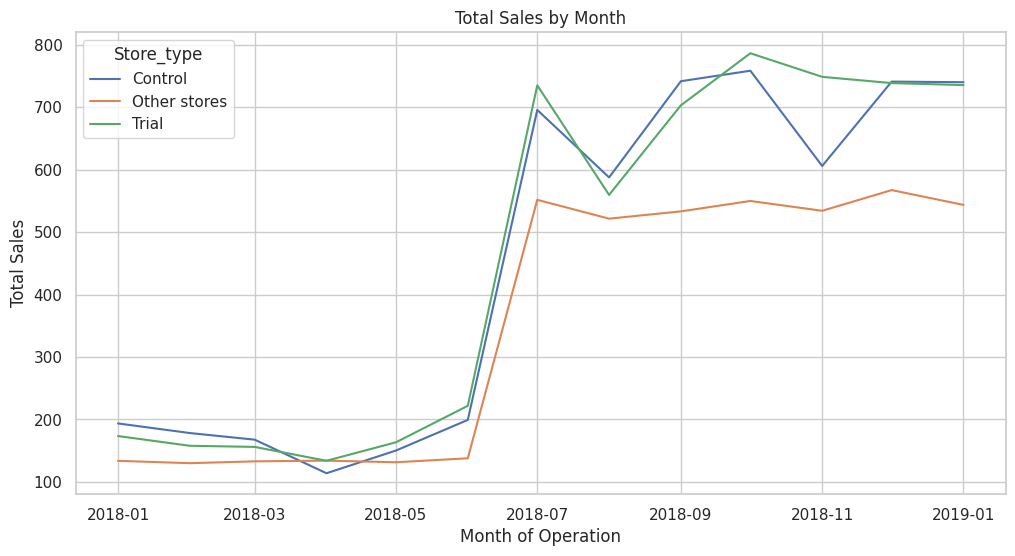

In [84]:
measureOverTimeSales = measureOverTime.copy()

# Define trial_store and control_store
trial_store = 86
control_store = 122
MTRIC = 'totSales'

# Create a new column Store_type based on STORE_NBR
measureOverTimeSales['Store_type'] = np.where(measureOverTimeSales['STORE_NBR'] == trial_store, 'Trial', 'Other stores')
measureOverTimeSales['Store_type'] = np.where(measureOverTimeSales['STORE_NBR'] == control_store, 'Control', measureOverTimeSales['Store_type'])

# Calculate mean total sales by YEARMONTH and Store_type
pastSales = measureOverTimeSales.groupby(['month_ID', 'Store_type'])[MTRIC].mean().reset_index()

# Filter data for months earlier than 201903
pastSales = pastSales[pastSales['month_ID'] < 201902]

# Convert YEARMONTH to a date
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['month_ID'], format='%Y%m')

# Create the line plot
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=pastSales, x='TransactionMonth', y=MTRIC, hue='Store_type')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.show()


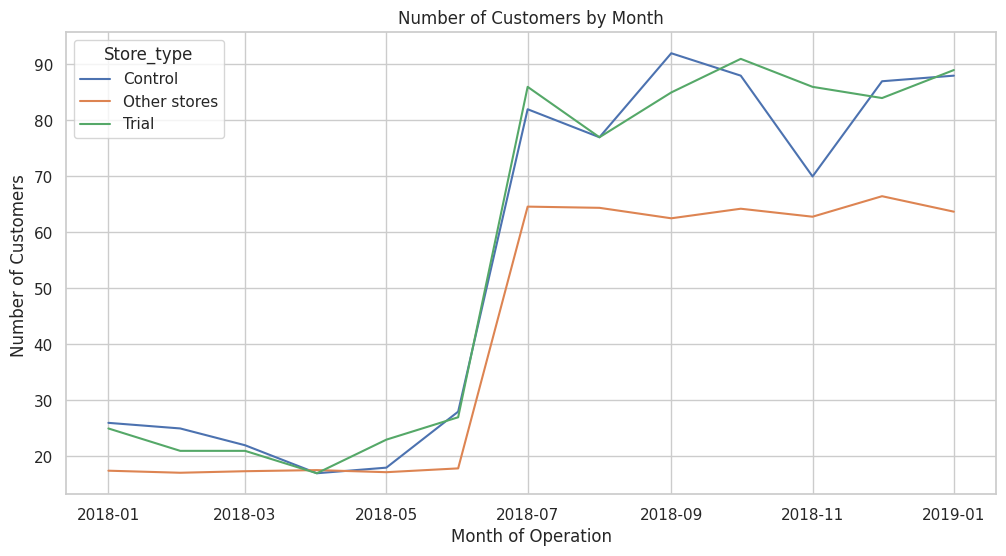

In [86]:
# Visulaizing the number of customers trend

measureOverTimeSales = measureOverTime.copy()

# Define trial_store and control_store
trial_store = 86
control_store = 122

# Create a new column Store_type based on STORE_NBR
measureOverTimeSales['Store_type'] = np.where(measureOverTimeSales['STORE_NBR'] == trial_store, 'Trial', 'Other stores')
measureOverTimeSales['Store_type'] = np.where(measureOverTimeSales['STORE_NBR'] == control_store, 'Control', measureOverTimeSales['Store_type'])

# Calculate mean total sales by YEARMONTH and Store_type
pastSales = measureOverTimeSales.groupby(['month_ID', 'Store_type'])['nCustomers'].mean().reset_index()

# Filter data for months earlier than 201903
pastSales = pastSales[pastSales['month_ID'] < 201902]

# Convert YEARMONTH to a date
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['month_ID'], format='%Y%m')

# Create the line plot
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=pastSales, x='TransactionMonth', y='nCustomers', hue='Store_type')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers ')
plt.title('Number of Customers by Month')
plt.show()

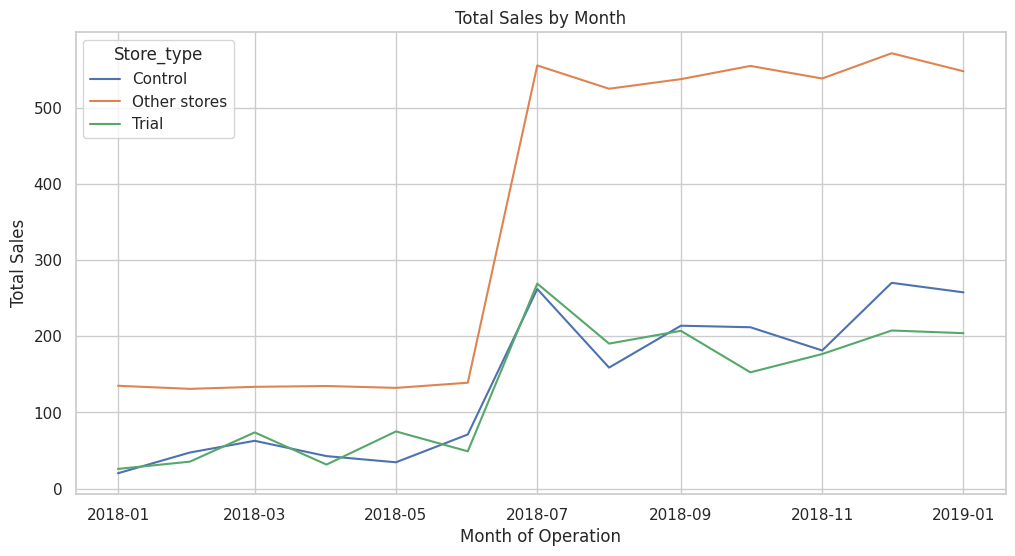

In [90]:
# For the store 77:

measureOverTimeSales = measureOverTime.copy()

# Define trial_store and control_store
trial_store = 77
control_store = 141

# Create a new column Store_type based on STORE_NBR
measureOverTimeSales['Store_type'] = np.where(measureOverTimeSales['STORE_NBR'] == trial_store, 'Trial', 'Other stores')
measureOverTimeSales['Store_type'] = np.where(measureOverTimeSales['STORE_NBR'] == control_store, 'Control', measureOverTimeSales['Store_type'])

# Calculate mean total sales by YEARMONTH and Store_type
pastSales = measureOverTimeSales.groupby(['month_ID', 'Store_type'])['totSales'].mean().reset_index()

# Filter data for months earlier than 201903
pastSales = pastSales[pastSales['month_ID'] < 201902]

# Convert YEARMONTH to a date
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['month_ID'], format='%Y%m')

# Create the line plot
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=pastSales, x='TransactionMonth', y='totSales', hue='Store_type')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.show()

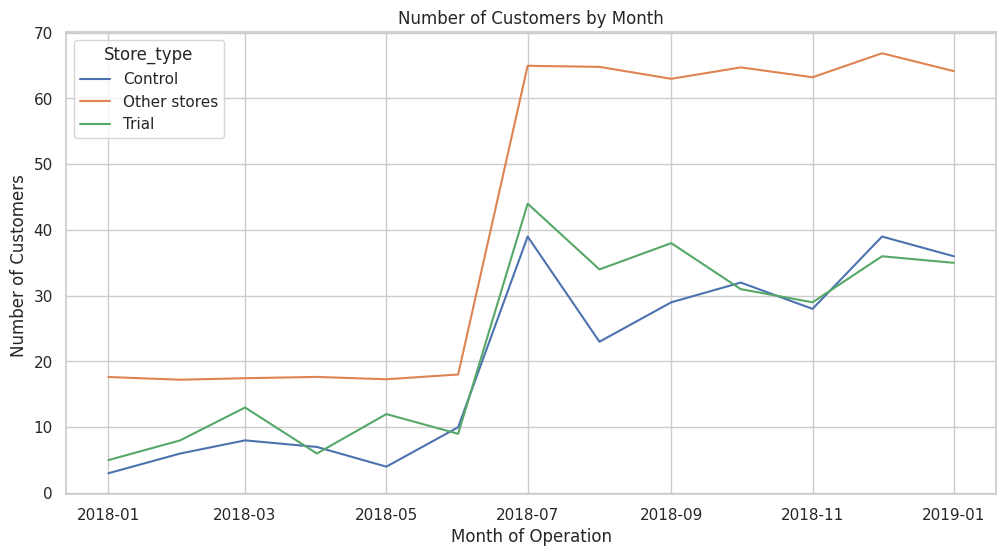

In [91]:
# Visulaizing the number of customers trend

measureOverTimeSales = measureOverTime.copy()

# Define trial_store and control_store
trial_store = 77
control_store = 141

# Create a new column Store_type based on STORE_NBR
measureOverTimeSales['Store_type'] = np.where(measureOverTimeSales['STORE_NBR'] == trial_store, 'Trial', 'Other stores')
measureOverTimeSales['Store_type'] = np.where(measureOverTimeSales['STORE_NBR'] == control_store, 'Control', measureOverTimeSales['Store_type'])

# Calculate mean total sales by YEARMONTH and Store_type
pastSales = measureOverTimeSales.groupby(['month_ID', 'Store_type'])['nCustomers'].mean().reset_index()

# Filter data for months earlier than 201903
pastSales = pastSales[pastSales['month_ID'] < 201902]

# Convert YEARMONTH to a date
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['month_ID'], format='%Y%m')

# Create the line plot
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=pastSales, x='TransactionMonth', y='nCustomers', hue='Store_type')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers ')
plt.title('Number of Customers by Month')
plt.show()

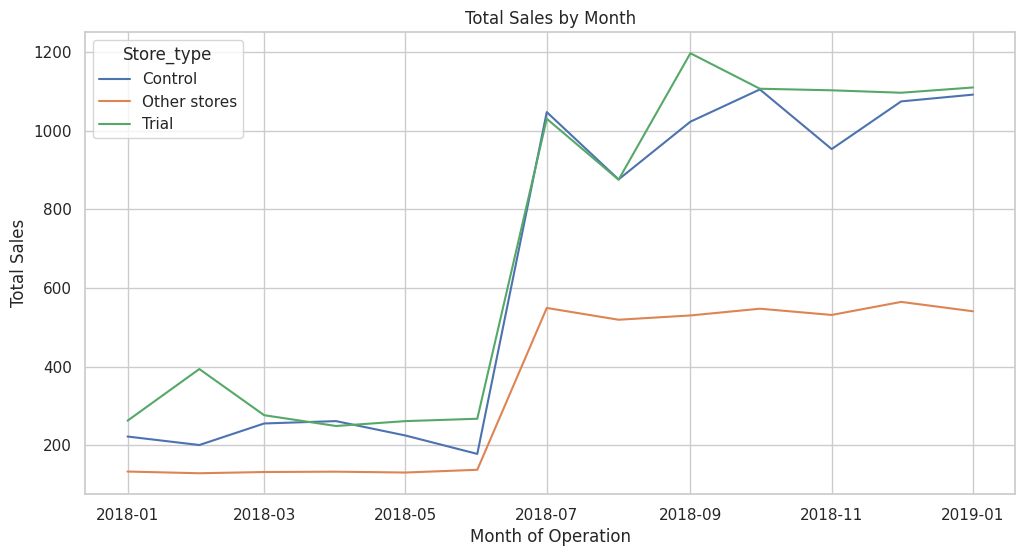

In [93]:
measureOverTimeSales = measureOverTime.copy()

# Define trial_store and control_store
trial_store = 88
control_store = 199

# Create a new column Store_type based on STORE_NBR
measureOverTimeSales['Store_type'] = np.where(measureOverTimeSales['STORE_NBR'] == trial_store, 'Trial', 'Other stores')
measureOverTimeSales['Store_type'] = np.where(measureOverTimeSales['STORE_NBR'] == control_store, 'Control', measureOverTimeSales['Store_type'])

# Calculate mean total sales by YEARMONTH and Store_type
pastSales = measureOverTimeSales.groupby(['month_ID', 'Store_type'])['totSales'].mean().reset_index()

# Filter data for months earlier than 201903
pastSales = pastSales[pastSales['month_ID'] < 201902]

# Convert YEARMONTH to a date
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['month_ID'], format='%Y%m')

# Create the line plot
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=pastSales, x='TransactionMonth', y='totSales', hue='Store_type')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.show()

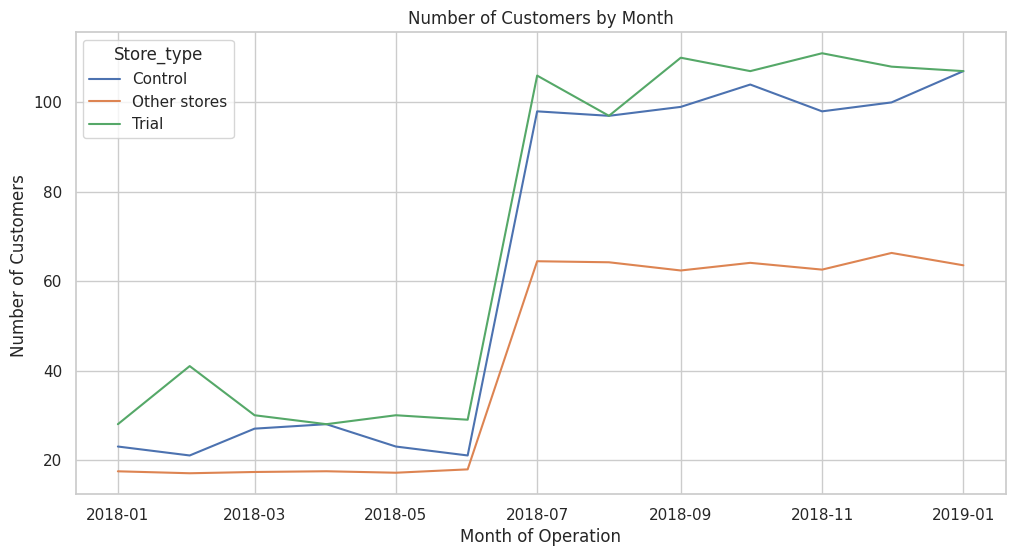

In [94]:
# Visulaizing the number of customers trend

measureOverTimeSales = measureOverTime.copy()

# Define trial_store and control_store
trial_store = 88
control_store = 199

# Create a new column Store_type based on STORE_NBR
measureOverTimeSales['Store_type'] = np.where(measureOverTimeSales['STORE_NBR'] == trial_store, 'Trial', 'Other stores')
measureOverTimeSales['Store_type'] = np.where(measureOverTimeSales['STORE_NBR'] == control_store, 'Control', measureOverTimeSales['Store_type'])

# Calculate mean total sales by YEARMONTH and Store_type
pastSales = measureOverTimeSales.groupby(['month_ID', 'Store_type'])['nCustomers'].mean().reset_index()

# Filter data for months earlier than 201902
pastSales = pastSales[pastSales['month_ID'] < 201902]

# Convert YEARMONTH to a date
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['month_ID'], format='%Y%m')

# Create the line plot
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=pastSales, x='TransactionMonth', y='nCustomers', hue='Store_type')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers ')
plt.title('Number of Customers by Month')
plt.show()

## Assessment of trial for 86 - 122

In [95]:
metrics_df.month_ID.unique()

array([201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808,
       201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904,
       201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912])

The trial period goes from the start of February 2019 to April 2019. We now want to
see if there has been an uplift in overall chip sales.

We'll start with scaling the control store's sales to a level similar to control
for any differences between the two stores outside of the trial period.

In [97]:
# Define the trial and control store numbers
trial_store = 86
control_store = 122

preTrialMeasures = measureOverTime[measureOverTime['month_ID'] < 201902]

# Calculate the scaling factor for control sales
scaling_factor_for_control_sales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['month_ID'] < 201902)]['totSales'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['month_ID'] < 201902)]['totSales'].sum()

# Apply the scaling factor to control store sales
measureOverTimeSales = metrics_df.copy()
measureOverTimeSales['controlSales'] = measureOverTimeSales[(measureOverTimeSales['STORE_NBR'] == control_store)]['totSales'] * scaling_factor_for_control_sales

In [98]:
measureOverTimeSales.controlSales.unique()

array([         nan, 198.21925467, 182.45181396, 171.59890022,
       116.51524371, 153.78373993, 203.95286947, 712.40163946,
       601.72239653, 759.49918964, 776.70003405, 620.45903063,
       758.88487376, 757.86101398, 653.83685967, 615.74927561,
       578.07123547, 694.48409319, 689.46718024, 215.62487104,
       209.27694036, 170.16549652, 142.52128228, 131.05405267,
       228.32073239])

Now that we have comparable sales figures for the control store, we can calculate
the percentage difference between the scaled control sales and the trial store's
sales during the trial period.


In [99]:
measureOverTrial = measureOverTimeSales[measureOverTimeSales['month_ID'].isin([201902,201903,201904])]
measureOverTrial

,STORE_NBR,month_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,controlSales
13,1,201902,159.0,39,1.051282,1.170732,3.312500,NaN
14,1,201903,102.5,24,1.083333,1.192308,3.306452,NaN
15,1,201904,171.7,39,1.025641,1.275000,3.366667,NaN
37,2,201902,113.8,26,1.038462,1.074074,3.924138,NaN
38,2,201903,157.2,35,1.028571,1.194444,3.655814,NaN
...,...,...,...,...,...,...,...,...
6186,271,201903,588.0,70,1.185714,2.000000,3.542169,NaN
6187,271,201904,678.6,76,1.236842,2.000000,3.609574,NaN
6209,272,201902,306.9,36,1.027778,1.918919,4.322535,NaN
6210,272,201903,320.2,36,1.083333,1.897436,4.327027,NaN


In [100]:
control_122 = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == 122]
trial_86 = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == 86]

In [101]:
# Merge the scaled control sales and trial sales DataFrames on the relevant columns
merged_sales = pd.merge(control_122, trial_86, on=['month_ID'], suffixes=('_control', '_trial'))
merged_sales

,STORE_NBR_control,month_ID,totSales_control,nCustomers_control,nTxnPerCust_control,nChipsPerTxn_control,avgPricePerUnit_control,controlSales_control,STORE_NBR_trial,totSales_trial,nCustomers_trial,nTxnPerCust_trial,nChipsPerTxn_trial,avgPricePerUnit_trial,controlSales_trial
0,122,201801,193.6,26,1.076923,2.000000,3.457143,198.219255,86,173.40,25,1.040000,2.000000,3.334615,NaN
1,122,201802,178.2,25,1.040000,2.000000,3.426923,182.451814,86,157.80,21,1.000000,2.000000,3.757143,NaN
2,122,201803,167.6,22,1.181818,2.000000,3.223077,171.598900,86,156.00,21,1.047619,2.000000,3.545455,NaN
3,122,201804,113.8,17,1.000000,2.000000,3.347059,116.515244,86,133.80,17,1.058824,2.000000,3.716667,NaN
4,122,201805,150.2,18,1.000000,2.111111,3.952632,153.783740,86,163.40,23,1.043478,2.083333,3.268000,NaN
5,122,201806,199.2,28,1.000000,2.000000,3.557143,203.952869,86,221.80,27,1.148148,2.064516,3.465625,NaN
6,122,201807,695.8,82,1.219512,2.020000,3.444554,712.401639,86,735.20,86,1.209302,1.990385,3.551691,NaN
7,122,201808,587.7,77,1.155844,1.797753,3.673125,601.722397,86,559.65,77,1.103896,1.941176,3.391818,NaN
8,122,201809,741.8,92,1.173913,2.018519,3.402752,759.499190,86,703.20,85,1.164706,2.000000,3.551515,NaN
9,122,201810,758.6,88,1.238636,2.036697,3.417117,776.700034,86,786.60,91,1.208791,2.000000,3.575455,NaN


In [102]:
# Calculate the percentage difference
merged_sales['percentageDiff'] = (merged_sales['totSales_trial'] - merged_sales['controlSales_control']) / merged_sales['controlSales_control'] * 100
merged_sales = merged_sales[['month_ID','STORE_NBR_control','controlSales_control', 'STORE_NBR_trial','totSales_trial','percentageDiff']]
merged_sales

,month_ID,STORE_NBR_control,controlSales_control,STORE_NBR_trial,totSales_trial,percentageDiff
0,201801,122,198.219255,86,173.40,-12.521112
1,201802,122,182.451814,86,157.80,-13.511411
2,201803,122,171.598900,86,156.00,-9.090326
3,201804,122,116.515244,86,133.80,14.834760
4,201805,122,153.783740,86,163.40,6.253106
5,201806,122,203.952869,86,221.80,8.750615
6,201807,122,712.401639,86,735.20,3.200212
7,201808,122,601.722397,86,559.65,-6.991994
8,201809,122,759.499190,86,703.20,-7.412673
9,201810,122,776.700034,86,786.60,1.274619


Let's see if the difference is significant

## our null hypothesis is that the trial period is the same as the pre-trial period

let's take the standard deviation based on the scaled percentage difference in the pre-trial period

In [109]:
pre_trial_std_dev = merged_sales[merged_sales['month_ID'] < 201902]['percentageDiff'].std()
stdDev = pre_trial_std_dev
stdDev

10.475810455610517

In [104]:
pre_trial_months = merged_sales[merged_sales['month_ID'] < 201902].shape[0]

Note that there are 13 months in the pretrial period then Degree of Freedom = 13- 1 = 12

In [105]:
degreeofFreedom = pre_trial_months - 1
degreeofFreedom

12

Let's see if the difference is significant!

We will test with a null hypothesis of there being 0 difference between trial
and control stores.

 Calculating the t-values for the trial months

In [106]:
# Calculate the t-values for the trial months
t_values = merged_sales[merged_sales['month_ID'].isin([201902, 201903, 201904])]['percentageDiff'] / (pre_trial_std_dev / (pre_trial_months)**0.5)
t_values

13     1.440392
14    14.815255
15     7.069011
Name: percentageDiff, dtype: float64

In [107]:
# Find the 95th percentile of the t-distribution
alpha = 0.05  # 1 - 0.95 = 0.05 (for the 95th percentile)
t_critical = stats.t.ppf(1 - alpha/2, degreeofFreedom)
t_critical

2.1788128296634177

We can observe that the t-value is much larger than the 95th percentile value of
the t-distribution for March and April - i.e. the increase in sales in the trial
store in March and April is statistically greater than in the control store

In [133]:
preTrialSales = merged_sales[merged_sales['month_ID'] < 201902]
preTrialSales

,month_ID,STORE_NBR_control,controlSales_control,STORE_NBR_trial,totSales_trial,percentageDiff
0,201801,122,198.219255,86,173.40,-12.521112
1,201802,122,182.451814,86,157.80,-13.511411
2,201803,122,171.598900,86,156.00,-9.090326
3,201804,122,116.515244,86,133.80,14.834760
4,201805,122,153.783740,86,163.40,6.253106
5,201806,122,203.952869,86,221.80,8.750615
6,201807,122,712.401639,86,735.20,3.200212
7,201808,122,601.722397,86,559.65,-6.991994
8,201809,122,759.499190,86,703.20,-7.412673
9,201810,122,776.700034,86,786.60,1.274619


## Visualizing graphs

In [137]:
filtered_data = merged_sales[(merged_sales['month_ID'] > 201812) & (merged_sales['month_ID'] < 201906)]
filtered_data

,month_ID,STORE_NBR_control,controlSales_control,STORE_NBR_trial,totSales_trial,percentageDiff
12,201901,122,757.861014,86,735.6,-2.937348
13,201902,122,653.836860,86,681.2,4.185010
14,201903,122,615.749276,86,880.8,43.045235
15,201904,122,578.071235,86,696.8,20.538777
16,201905,122,694.484093,86,750.5,8.065830


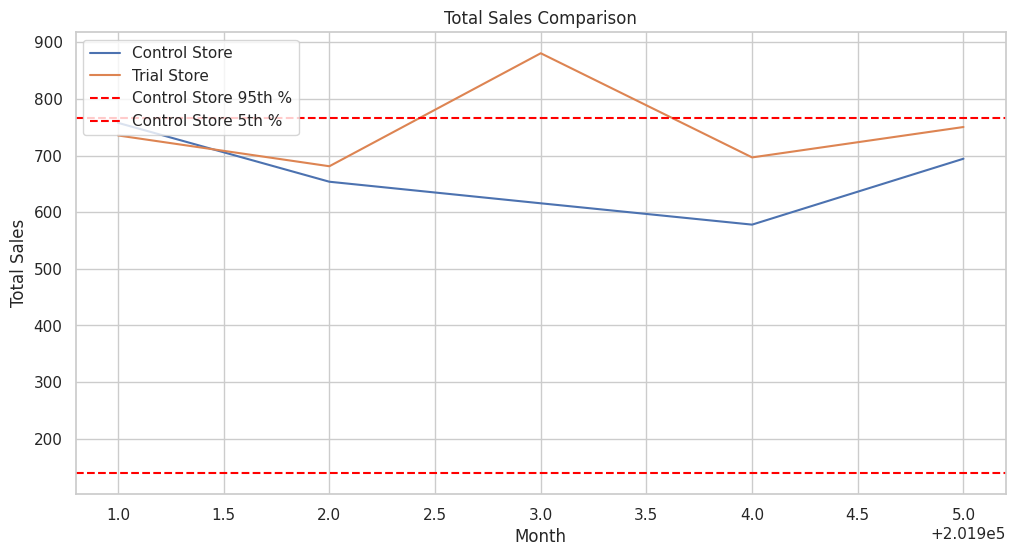

In [138]:
# Create a figure and set style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot the control store's sales
sns.lineplot(data=filtered_data, x='month_ID', y='controlSales_control', label='Control Store')

# Plot the trial store's sales
sns.lineplot(data=filtered_data, x='month_ID', y='totSales_trial', label='Trial Store')

# Calculate and plot the 95th percentile value of control store sales
control_95th_percentile = preTrialSales['controlSales_control'].quantile(0.95)
plt.axhline(y=control_95th_percentile, color='red', linestyle='--', label='Control Store 95th %')
control_5th_percentile = preTrialSales['controlSales_control'].quantile(0.05)
plt.axhline(y=control_5th_percentile, color='red', linestyle='--', label='Control Store 5th %')


# Set labels and title
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales Comparison")

# Show the legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

The CI clearly depicts that the the sales in march are outside the CI and thus statistically singnificant. The sales in april lie inside the confidence interval

## Assessment of trial for 88 - 199

The trial period goes from the start of February 2019 to April 2019. We now want to
see if there has been an uplift in overall chip sales.

We'll start with scaling the control store's sales to a level similar to control
for any differences between the two stores outside of the trial period.

In [140]:
# Define the trial and control store numbers
trial_store = 88
control_store = 199

preTrialMeasures = measureOverTime[measureOverTime['month_ID'] < 201902]

# Calculate the scaling factor for control sales
scaling_factor_for_control_sales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['month_ID'] < 201902)]['totSales'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['month_ID'] < 201902)]['totSales'].sum()

# Apply the scaling factor to control store sales
measureOverTimeSales = metrics_df.copy()
measureOverTimeSales['controlSales'] = measureOverTimeSales[(measureOverTimeSales['STORE_NBR'] == control_store)]['totSales'] * scaling_factor_for_control_sales

In [141]:
measureOverTimeSales.controlSales.unique()

array([          nan,  240.88767007,  217.47104688,  276.8798872 ,
        283.38450476,  243.70633768,  192.97032076, 1135.05576313,
        949.45734226, 1108.60365174, 1197.50009165, 1033.15008812,
       1164.54336271, 1183.18993303, 1021.44177652, 1053.09758195,
       1004.09612971, 1127.46704265, 1091.04118435,  241.971773  ,
        253.24644343,  309.61979556,  233.08212901,  208.14776172,
        271.45937258])

Now that we have comparable sales figures for the control store, we can calculate
the percentage difference between the scaled control sales and the trial store's
sales during the trial period.


In [142]:
measureOverTrial = measureOverTimeSales[measureOverTimeSales['month_ID'].isin([201902,201903,201904])]
measureOverTrial

,STORE_NBR,month_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,controlSales
13,1,201902,159.0,39,1.051282,1.170732,3.312500,NaN
14,1,201903,102.5,24,1.083333,1.192308,3.306452,NaN
15,1,201904,171.7,39,1.025641,1.275000,3.366667,NaN
37,2,201902,113.8,26,1.038462,1.074074,3.924138,NaN
38,2,201903,157.2,35,1.028571,1.194444,3.655814,NaN
...,...,...,...,...,...,...,...,...
6186,271,201903,588.0,70,1.185714,2.000000,3.542169,NaN
6187,271,201904,678.6,76,1.236842,2.000000,3.609574,NaN
6209,272,201902,306.9,36,1.027778,1.918919,4.322535,NaN
6210,272,201903,320.2,36,1.083333,1.897436,4.327027,NaN


In [143]:
control_store = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == control_store]
trial_store = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == trial_store]

In [146]:
# Merge the scaled control sales and trial sales DataFrames on the relevant columns
merged_sales = pd.merge(control_store, trial_store, on=['month_ID'], suffixes=('_control', '_trial'))
merged_sales.head()

,STORE_NBR_control,month_ID,totSales_control,nCustomers_control,nTxnPerCust_control,nChipsPerTxn_control,avgPricePerUnit_control,controlSales_control,STORE_NBR_trial,totSales_trial,nCustomers_trial,nTxnPerCust_trial,nChipsPerTxn_trial,avgPricePerUnit_trial,controlSales_trial
0,199,201801,222.2,23,1.043478,2.000000,4.629167,240.887670,88,262.4,28,1.071429,2.000000,4.373333,NaN
1,199,201802,200.6,21,1.047619,2.000000,4.559091,217.471047,88,393.8,41,1.048780,2.046512,4.475000,NaN
2,199,201803,255.4,27,1.074074,2.068966,4.256667,276.879887,88,276.4,30,1.000000,2.000000,4.606667,NaN
3,199,201804,261.4,28,1.000000,2.000000,4.667857,283.384505,88,249.0,28,1.035714,2.000000,4.293103,NaN
4,199,201805,224.8,23,1.086957,2.000000,4.496000,243.706338,88,261.4,30,1.000000,2.000000,4.356667,NaN


In [149]:
# Calculate the percentage difference
merged_sales['percentageDiff'] = (merged_sales['totSales_trial'] - merged_sales['controlSales_control']) / merged_sales['controlSales_control'] * 100
merged_sales = merged_sales[['month_ID','STORE_NBR_control','controlSales_control', 'STORE_NBR_trial','totSales_trial','percentageDiff']]
merged_sales.head()

,month_ID,STORE_NBR_control,controlSales_control,STORE_NBR_trial,totSales_trial,percentageDiff
0,201801,199,240.887670,88,262.4,8.930440
1,201802,199,217.471047,88,393.8,81.081576
2,201803,199,276.879887,88,276.4,-0.173320
3,201804,199,283.384505,88,249.0,-12.133516
4,201805,199,243.706338,88,261.4,7.260239


Let's see if the difference is significant

## our null hypothesis is that the trial period is the same as the pre-trial period

let's take the standard deviation based on the scaled percentage difference in the pre-trial period

In [150]:
pre_trial_std_dev = merged_sales[merged_sales['month_ID'] < 201902]['percentageDiff'].std()
pre_trial_std_dev

25.717064920349642

In [151]:
pre_trial_months = merged_sales[merged_sales['month_ID'] < 201902].shape[0]

Note that there are 13 months in the pretrial period then Degree of Freedom = 13- 1 = 12

In [152]:
degreeofFreedom = pre_trial_months - 1
degreeofFreedom

12

Let's see if the difference is significant!

We will test with a null hypothesis of there being 0 difference between trial
and control stores.

 Calculating the t-values for the trial months

In [153]:
# Calculate the t-values for the trial months
t_values = merged_sales[merged_sales['month_ID'].isin([201902, 201903, 201904])]['percentageDiff'] / (pre_trial_std_dev / (pre_trial_months)**0.5)
t_values

13   -0.132341
14    1.835919
15    1.417286
Name: percentageDiff, dtype: float64

In [154]:
# Find the 95th percentile of the t-distribution
alpha = 0.05  # 1 - 0.95 = 0.05 (for the 95th percentile)
t_critical = stats.t.ppf(1 - alpha/2, degreeofFreedom)
t_critical

2.1788128296634177

In [156]:
preTrialSales = merged_sales[merged_sales['month_ID'] < 201902]
preTrialSales

,month_ID,STORE_NBR_control,controlSales_control,STORE_NBR_trial,totSales_trial,percentageDiff
0,201801,199,240.887670,88,262.4,8.930440
1,201802,199,217.471047,88,393.8,81.081576
2,201803,199,276.879887,88,276.4,-0.173320
3,201804,199,283.384505,88,249.0,-12.133516
4,201805,199,243.706338,88,261.4,7.260239
5,201806,199,192.970321,88,267.4,38.570532
6,201807,199,1135.055763,88,1030.0,-9.255560
7,201808,199,949.457342,88,875.2,-7.821030
8,201809,199,1108.603652,88,1196.6,7.937584
9,201810,199,1197.500092,88,1106.4,-7.607523


## Visualizing graphs

In [157]:
filtered_data = merged_sales[(merged_sales['month_ID'] > 201901) & (merged_sales['month_ID'] < 201905)]
filtered_data

,month_ID,STORE_NBR_control,controlSales_control,STORE_NBR_trial,totSales_trial,percentageDiff
13,201902,199,1021.441777,88,1011.8,-0.943938
14,201903,199,1053.097582,88,1191.0,13.094933
15,201904,199,1004.096130,88,1105.6,10.108979


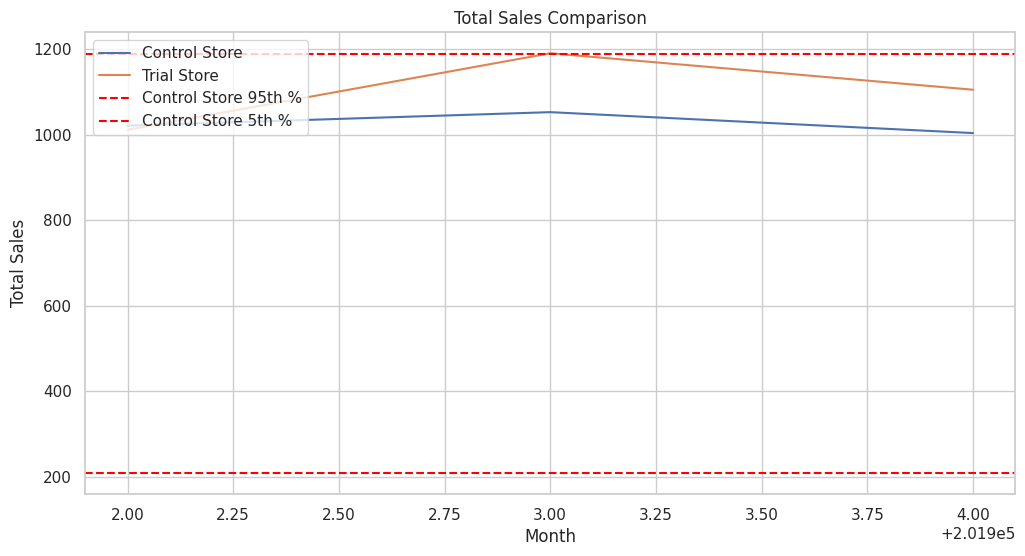

In [158]:
# Create a figure and set style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot the control store's sales
sns.lineplot(data=filtered_data, x='month_ID', y='controlSales_control', label='Control Store')

# Plot the trial store's sales
sns.lineplot(data=filtered_data, x='month_ID', y='totSales_trial', label='Trial Store')

# Calculate and plot the 95th percentile value of control store sales
control_95th_percentile = preTrialSales['controlSales_control'].quantile(0.95)
plt.axhline(y=control_95th_percentile, color='red', linestyle='--', label='Control Store 95th %')
control_5th_percentile = preTrialSales['controlSales_control'].quantile(0.05)
plt.axhline(y=control_5th_percentile, color='red', linestyle='--', label='Control Store 5th %')
# Set labels and title
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales Comparison")

# Show the legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

## Assessment of trial for 77 - 141


The trial period goes from the start of February 2019 to April 2019. We now want to
see if there has been an uplift in overall chip sales.

We'll start with scaling the control store's sales to a level similar to control
for any differences between the two stores outside of the trial period.

In [159]:
# Define the trial and control store numbers
trial_store = 77
control_store = 141

preTrialMeasures = measureOverTime[measureOverTime['month_ID'] < 201902]

# Calculate the scaling factor for control sales
scaling_factor_for_control_sales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['month_ID'] < 201902)]['totSales'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['month_ID'] < 201902)]['totSales'].sum()

# Apply the scaling factor to control store sales
measureOverTimeSales = metrics_df.copy()
measureOverTimeSales['controlSales'] = measureOverTimeSales[(measureOverTimeSales['STORE_NBR'] == control_store)]['totSales'] * scaling_factor_for_control_sales

In [160]:
measureOverTimeSales.controlSales.unique()

array([         nan,  18.70060494,  43.88161753,  58.13851436,
        39.53048668,  32.03172925,  65.82242629, 242.64497793,
       147.10525369, 198.02274238, 196.17119734, 167.93513543,
       250.14373535, 238.57157883, 218.57489236, 189.96852145,
       146.27205842, 159.04771922, 213.20541174,  15.83071012,
        20.82988174,  39.16017767,  14.25689683,  10.8315385 ,
        74.15437899])

Now that we have comparable sales figures for the control store, we can calculate
the percentage difference between the scaled control sales and the trial store's
sales during the trial period.


In [161]:
measureOverTrial = measureOverTimeSales[measureOverTimeSales['month_ID'].isin([201902,201903,201904])]
measureOverTrial

,STORE_NBR,month_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,controlSales
13,1,201902,159.0,39,1.051282,1.170732,3.312500,NaN
14,1,201903,102.5,24,1.083333,1.192308,3.306452,NaN
15,1,201904,171.7,39,1.025641,1.275000,3.366667,NaN
37,2,201902,113.8,26,1.038462,1.074074,3.924138,NaN
38,2,201903,157.2,35,1.028571,1.194444,3.655814,NaN
...,...,...,...,...,...,...,...,...
6186,271,201903,588.0,70,1.185714,2.000000,3.542169,NaN
6187,271,201904,678.6,76,1.236842,2.000000,3.609574,NaN
6209,272,201902,306.9,36,1.027778,1.918919,4.322535,NaN
6210,272,201903,320.2,36,1.083333,1.897436,4.327027,NaN


In [162]:
control_store = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == control_store]
trial_store = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == trial_store]

In [163]:
# Merge the scaled control sales and trial sales DataFrames on the relevant columns
merged_sales = pd.merge(control_store, trial_store, on=['month_ID'], suffixes=('_control', '_trial'))
merged_sales

,STORE_NBR_control,month_ID,totSales_control,nCustomers_control,nTxnPerCust_control,nChipsPerTxn_control,avgPricePerUnit_control,controlSales_control,STORE_NBR_trial,totSales_trial,nCustomers_trial,nTxnPerCust_trial,nChipsPerTxn_trial,avgPricePerUnit_trial,controlSales_trial
0,141,201801,20.2,3,1.000000,1.333333,5.050000,18.700605,77,25.9,5,1.000000,1.600000,3.237500,NaN
1,141,201802,47.4,6,1.000000,1.666667,4.740000,43.881618,77,35.4,8,1.000000,1.750000,2.528571,NaN
2,141,201803,62.8,8,1.000000,1.625000,4.830769,58.138514,77,73.8,13,1.000000,1.461538,3.884211,NaN
3,141,201804,42.7,7,1.000000,1.428571,4.270000,39.530487,77,31.6,6,1.000000,1.333333,3.950000,NaN
4,141,201805,34.6,4,1.000000,1.750000,4.942857,32.031729,77,75.1,12,1.083333,1.615385,3.576190,NaN
5,141,201806,71.1,10,1.000000,1.600000,4.443750,65.822426,77,49.0,9,1.000000,1.555556,3.500000,NaN
6,141,201807,262.1,39,1.076923,1.404762,4.442373,242.644978,77,269.2,44,1.113636,1.530612,3.589333,NaN
7,141,201808,158.9,23,1.043478,1.541667,4.294595,147.105254,77,190.4,34,1.000000,1.529412,3.661538,NaN
8,141,201809,213.9,29,1.034483,1.600000,4.456250,198.022742,77,207.2,38,1.052632,1.525000,3.396721,NaN
9,141,201810,211.9,32,1.031250,1.545455,4.154902,196.171197,77,152.7,31,1.032258,1.281250,3.724390,NaN


In [164]:
# Calculate the percentage difference
merged_sales['percentageDiff'] = (merged_sales['totSales_trial'] - merged_sales['controlSales_control']) / merged_sales['controlSales_control'] * 100
merged_sales = merged_sales[['month_ID','STORE_NBR_control','controlSales_control', 'STORE_NBR_trial','totSales_trial','percentageDiff']]
merged_sales

,month_ID,STORE_NBR_control,controlSales_control,STORE_NBR_trial,totSales_trial,percentageDiff
0,201801,141,18.700605,77,25.9,38.498193
1,201802,141,43.881618,77,35.4,-19.328407
2,201803,141,58.138514,77,73.8,26.938228
3,201804,141,39.530487,77,31.6,-20.061698
4,201805,141,32.031729,77,75.1,134.455029
5,201806,141,65.822426,77,49.0,-25.557287
6,201807,141,242.644978,77,269.2,10.943982
7,201808,141,147.105254,77,190.4,29.431135
8,201809,141,198.022742,77,207.2,4.634446
9,201810,141,196.171197,77,152.7,-22.159827


Let's see if the difference is significant

## our null hypothesis is that the trial period is the same as the pre-trial period

let's take the standard deviation based on the scaled percentage difference in the pre-trial period

In [165]:
pre_trial_std_dev = merged_sales[merged_sales['month_ID'] < 201902]['percentageDiff'].std()
pre_trial_std_dev

43.21230340902509

In [166]:
pre_trial_months = merged_sales[merged_sales['month_ID'] < 201902].shape[0]

Note that there are 13 months in the pretrial period then Degree of Freedom = 13- 1 = 12

In [167]:
degreeofFreedom = pre_trial_months - 1
degreeofFreedom

12

Let's see if the difference is significant!

We will test with a null hypothesis of there being 0 difference between trial
and control stores.

 Calculating the t-values for the trial months

In [168]:
# Calculate the t-values for the trial months
t_values = merged_sales[merged_sales['month_ID'].isin([201902, 201903, 201904])]['percentageDiff'] / (pre_trial_std_dev / (pre_trial_months)**0.5)
t_values

13   -2.426887
14    0.818333
15    4.502292
Name: percentageDiff, dtype: float64

In [169]:
# Find the 95th percentile of the t-distribution
alpha = 0.05  # 1 - 0.95 = 0.05 (for the 95th percentile)
t_critical = stats.t.ppf(1 - alpha/2, degreeofFreedom)
t_critical

2.1788128296634177

We can observe that the t-value is much larger than the 95th percentile value of
the t-distribution for March and April - i.e. the increase in sales in the trial
store in March and April is statistically greater than in the control store

## Visualizing graphs

In [170]:
filtered_data = merged_sales[(merged_sales['month_ID'] > 201901) & (merged_sales['month_ID'] < 201905)]
filtered_data

,month_ID,STORE_NBR_control,controlSales_control,STORE_NBR_trial,totSales_trial,percentageDiff
13,201902,141,218.574892,77,155.0,-29.086091
14,201903,141,189.968521,77,208.6,9.807666
15,201904,141,146.272058,77,225.2,53.959685


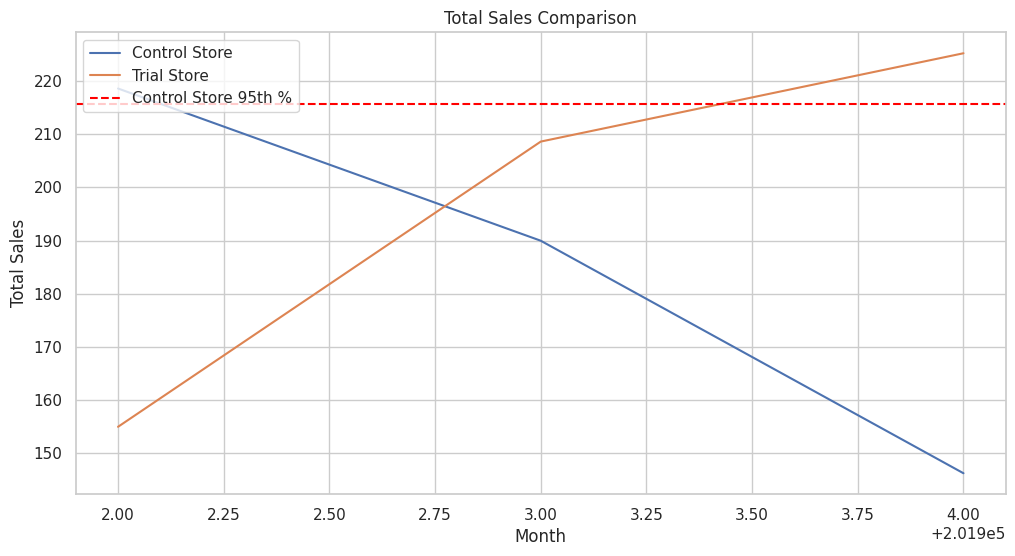

In [172]:
# Create a figure and set style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot the control store's sales
sns.lineplot(data=filtered_data, x='month_ID', y='controlSales_control', label='Control Store')

# Plot the trial store's sales
sns.lineplot(data=filtered_data, x='month_ID', y='totSales_trial', label='Trial Store')

# Calculate and plot the 95th percentile value of control store sales
control_95th_percentile = filtered_data['controlSales_control'].quantile(0.95)
plt.axhline(y=control_95th_percentile, color='red', linestyle='--', label='Control Store 95th %')

# Set labels and title
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales Comparison")

# Show the legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

The results show that the trial in store 77 is significantly different to its
control store in the trial period as the trial store performance lies outside the
5% to 95% confidence interval of the control store in two of the three trial
months.